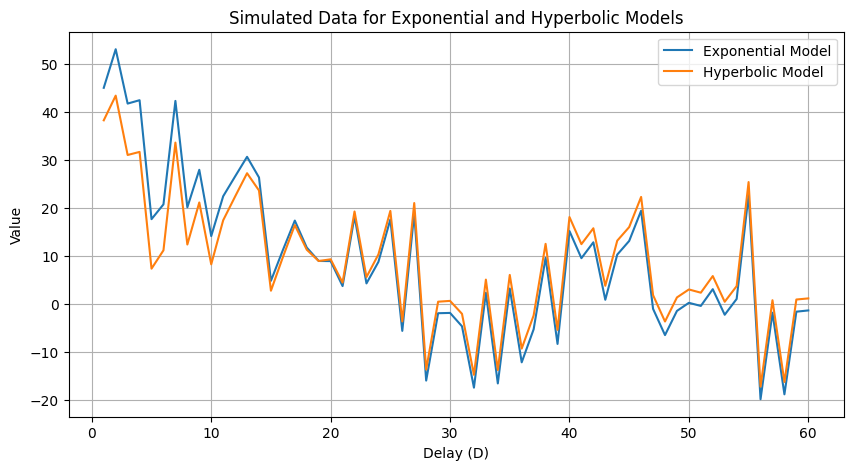

<ipython-input-10-b0cae51f9ba6>:48: RuntimeWarning: overflow encountered in exp
  return A * np.exp(-k * x) + B


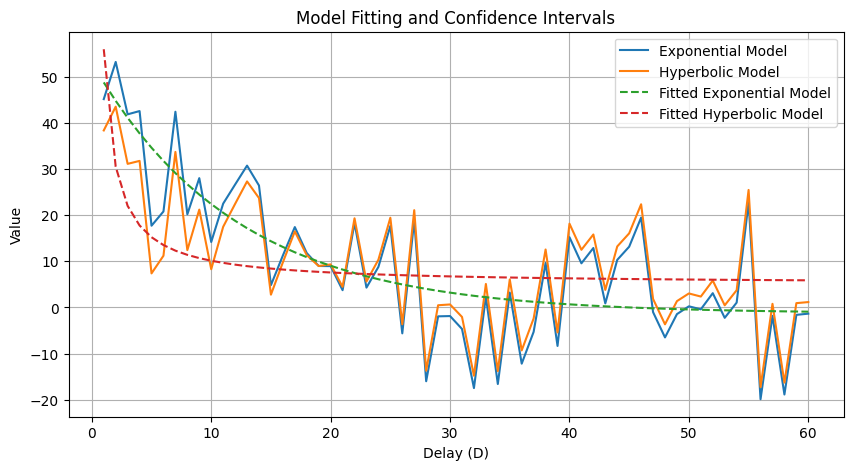

Exponential Model: k = 0.0830971830835907, B = -1.288377979532345
Hyperbolic Model: k = -4465640.798520711, B = 5.024624801115361


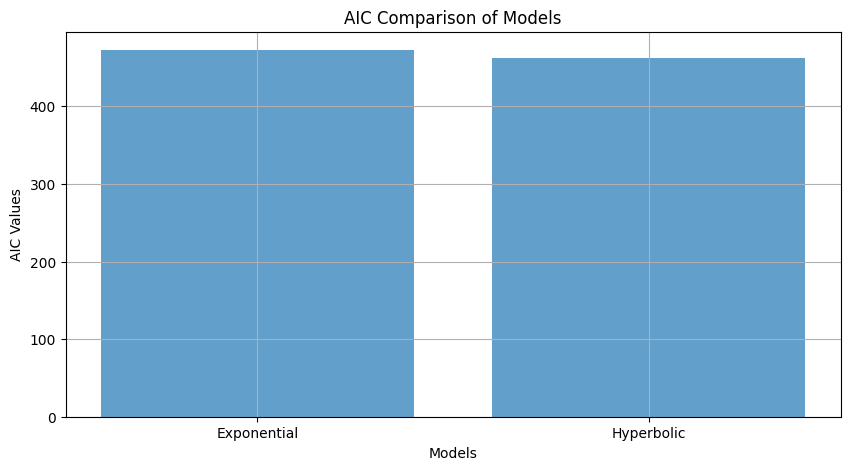

Better Model: Exponential Model


In [10]:
from matplotlib.container import BarContainer
from re import X
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize
import statsmodels.api as sm
from scipy.stats import ttest_rel

# Set parameters
A = 50
k = 0.1
B = 0.3
noise_std_dev = 9
n_data_points = 60

# Create an array of delay values
delay_values = np.arange(1, n_data_points + 1)

# Initialize arrays to store the data points
data_points_exp = np.zeros(n_data_points)
data_points_hyp = np.zeros(n_data_points)

# Generate data points with noise
for i in range(n_data_points):
    delay = delay_values[i]
    noise = np.random.normal(0, noise_std_dev)

    # Exponential model
    data_points_exp[i] = A * np.exp(-k * delay)  + noise

    # Hyperbolic model
    data_points_hyp[i] = A / (1 + B * delay)  + noise

# Create plots
plt.figure(figsize=(10, 5))
plt.plot(delay_values, data_points_exp, label='Exponential Model')
plt.plot(delay_values, data_points_hyp, label='Hyperbolic Model')
plt.xlabel('Delay (D)')
plt.ylabel('Value')
plt.legend()
plt.title('Simulated Data for Exponential and Hyperbolic Models')
plt.grid(True)
plt.show()

noise = np.random.normal(0, noise_std_dev)
# Define the exponential and hyperbolic models
def exponential_model(x, A, k, B):
    return A * np.exp(-k * x) + B

def hyperbolic_model(x, A, k, B):
    return A / (1 + k * x) + B

# Fit the models to the data
params_exp, _ = optimize.curve_fit(exponential_model, delay_values, data_points_exp)
params_hyp, _ = optimize.curve_fit(hyperbolic_model, delay_values, data_points_hyp)

# Calculate mean and 95% confidence intervals for parameters
mean_k_exp, mean_B_exp = params_exp[1], params_exp[2]
mean_k_hyp, mean_B_hyp = params_hyp[1], params_hyp[2]

# Create plots
plt.figure(figsize=(10, 5))
plt.plot(delay_values, data_points_exp, label='Exponential Model')
plt.plot(delay_values, data_points_hyp, label='Hyperbolic Model')
plt.plot(delay_values, exponential_model(delay_values, *params_exp), linestyle='--', label='Fitted Exponential Model')
plt.plot(delay_values, hyperbolic_model(delay_values, *params_hyp), linestyle='--', label='Fitted Hyperbolic Model')
plt.xlabel('Delay (D)')
plt.ylabel('Value')
plt.legend()
plt.title('Model Fitting and Confidence Intervals')
plt.grid(True)
plt.show()

print(f"Exponential Model: k = {mean_k_exp}, B = {mean_B_exp}")
print(f"Hyperbolic Model: k = {mean_k_hyp}, B = {mean_B_hyp}")



# Calculate AIC for the two models
aic_exp = sm.OLS(data_points_exp, sm.add_constant(delay_values)).fit().aic
aic_hyp = sm.OLS(data_points_hyp, sm.add_constant(delay_values)).fit().aic

# Perform bootstrapped t-test
n_simulations = 10000  # Number of bootstrap simulations
t_statistic_values = np.zeros(n_simulations)

for i in range(n_simulations):
    # Generate bootstrap samples by resampling the data with replacement
    bootstrap_samples_exp = np.random.choice(data_points_exp, size=n_data_points, replace=True)
    bootstrap_samples_hyp = np.random.choice(data_points_hyp, size=n_data_points, replace=True)

    # Calculate t-statistic for the bootstrapped samples
    t_statistic, _ = ttest_rel(bootstrap_samples_exp, bootstrap_samples_hyp)
    t_statistic_values[i] = t_statistic

# Calculate the 95% confidence interval of the t-statistic
conf_int_t_statistic = np.percentile(t_statistic_values, [2.5, 97.5])

# Determine which model is better
if conf_int_t_statistic[0] > 0:
    better_model = "Hyperbolic Model"
else:
    better_model = "Exponential Model"

# Create plots
plt.figure(figsize=(10, 5))
plt.bar(['Exponential', 'Hyperbolic'], [aic_exp, aic_hyp], alpha=0.7, capsize=5)
plt.xlabel('Models')
plt.ylabel('AIC Values')
plt.title('AIC Comparison of Models')
plt.grid(True)
plt.show()

print(f"Better Model: {better_model}")